# Workshop N.2: Parametric (spatial) building frame in reinforced concrete

# Immagine di riferimento da realizzare

<img src="http://design.rootiers.it/2010/sites/default/files/155/telaio%20finale.JPG"> 

# Funzione per la lettura delle dimensioni dell'edificio in cemento armato da file csv
def ggpl_bone_structure(file_name):
	
	lengthPerpendicularBeams = []
	""" open csv file """
	with open(file_name, 'rb') as csvFile:
		reader = csv.reader(csvFile)
		i=0
#### Ciclo for per recuperare le dimensioni dal file csv (nelle righe dispari ci sono le dimensioni per la realizzazione del telaio mentre in quelle pari le distanze tra i telai)
		for row in reader:
			if i%2==1:
				lengthPerpendicularBeams = lengthPerpendicularBeams + [float(row[0])]
				i=i+1
			elif i%2==0:
				(px,py)=(float(row[0]),float(row[1]))
				pillarDistances = []
				j=3
				while row[j]!="]":
					pillarDistances.append(float(row[j]))
					j=j+1
				(by,bz)= (float(row[j+1]),float(row[j+2]))
				j= j+4
				beamInterstoryHeights = []
				while row[j]!="]":
					beamInterstoryHeights.append(float(row[j]))
					j=j+1	
				i=i+1
#### La funzione ritorna la struttura realizzata attraverso la funzione "makeStruct"
#### I paramentri da passare alla funzione sono stati presi dal file csv e salvati nelle rispettive variabili attraverso il precedente ciclo for
	return makeStruct((px,py), pillarDistances, (by,bz), beamInterstoryHeights, lengthPerpendicularBeams)
    

# File csv contenente le dimensioni dell'edificio in cemento armato

    0.4,0.4,[,6,3,],0.4,0.4,[,2,2,2,2,]
    4
    0.4,0.4,[,6,3,],0.4,0.4,[,2,2,2,2,]
    4
    0.4,0.4,[,6,3,],0.4,0.4,[,2,2,2,2,]
    4
    0.4,0.4,[,6,3,],0.4,0.4,[,2,2,2,2,]
    4
    0.4,0.4,[,6,3,],0.4,0.4,[,2,2,2,2,]
    4
    0.4,0.4,[,6,3,],0.4,0.4,[,2,2,2,2,]
    4
    0.4,0.4,[,6,3,],0.4,0.4,[,2,2,2,2,]

# Funzione per la realizzazione della struttura 

#### La funzione "makeStruct" necessita in input delle coordinate px e py della base dei pilastri, un array con la distanza tra i pilastri in un unico telaio, le coordinate by e bz delle travi del singolo telaio, un array contenente le distanze tra le travi nel singolo telaio ed infine un array contenente le distanze tra i telai

def makeStruct((px,py),pillarDistances,(by,bz), beamInterstoryHeights, lengthPerpendicularBeams):

	""" array for the pillar foundations """
	pillarArray = [px]
	for value in pillarDistances:
		pillarArray = pillarArray+[-value]+[px]
	
	""" x-axis of the pillar """
	xBasePillar = QUOTE(pillarArray)
	
	""" y-axis of the pillar """
	yBasePillar = QUOTE([py])

	xyBasePillar = PROD([xBasePillar, yBasePillar])

	""" array for the z-axis of the pillar """
	heightsPillar = []
	for value in beamInterstoryHeights:
		heightsPillar = heightsPillar+[value+bz]
	
	""" z-axis of the pillar """
	zBasePillar = QUOTE(heightsPillar)

	pillars = PROD([xyBasePillar, zBasePillar])

	""" array for the realization of the beams """
	beamStruct = [ -x for x in pillarArray]
	
	""" x-axis of the beams """
	xBaseBeam = QUOTE(beamStruct)

	""" y-axis of the beams """
	yBaseBeam = QUOTE([by])

	xyBaseBeam = PROD([xBaseBeam, yBaseBeam])

	""" array for distance between the beams """
	beamsDistance = []
	for value in beamInterstoryHeights:
		beamsDistance = beamsDistance+[-value]+[bz]

	beams = PROD([xyBaseBeam, QUOTE(beamsDistance)])

	""" frame """
	struct = STRUCT([pillars, beams])
	
	""" distance between frames """
	framesDistance = []
	for value in lengthPerpendicularBeams:
		framesDistance = framesDistance + [-py] + [value]

	""" creating beams between frames """
	yBasePerpendicularBeams = QUOTE(framesDistance)

	xBasePerpendicularBeams = QUOTE([by])

	xyBasePerpendicularBeams = PROD([xBasePerpendicularBeams, yBasePerpendicularBeams])

	xyzBasePerpendicularBeams = PROD([xyBasePerpendicularBeams, QUOTE(beamsDistance)])

	xyzStruct = STRUCT([xyzBasePerpendicularBeams])
	
	""" creating arrays for the function T() """
	accumulator=0
	arrayBeams = []

	for value in lengthPerpendicularBeams:
		accumulator = accumulator+value
		arrayBeams=arrayBeams+[accumulator]

	accumulator = 0
	arrayPillar = []
	for value in pillarDistances:
		accumulator = accumulator+value
		arrayPillar=arrayPillar+[accumulator]

	""" duplication frames and perpendicular beams """
	dist=py
	structFrames=struct
	for value in arrayBeams:
		structFrames = STRUCT([structFrames, T(2)(value+dist), struct])
		dist+=py

	dist=px
	structBeams= xyzStruct
	for value in arrayPillar:
		structBeams = STRUCT([structBeams, T(1)(value+dist), xyzStruct])
		dist+=px

	""" merge duplicate structures """
	finalStruct =  STRUCT([structFrames, structBeams])
    
#### La funzione ritorna la struttura realizzata attraverso la primitiva "STRUCT()"
	return finalStruct

# Porzione della funzione "makeStruct()" per la realizzazione dei pilastri di un telaio della struttura

#### Creazione array da passare a QUOTE() per la realizzazione della coordinata x della base dei pilastri del telaio (l'array conterrà la coordinata px del pilastro seguito dalla distanza negativa tra il pilastro successivo in modo da lasciare tale distanza in sequenza fino all'aggiunta dell'ultima px per l'ultimo pilastro)

    """ array for the pillar foundations """
	pillarArray = [px]
	for value in pillarDistances:
		pillarArray = pillarArray+[-value]+[px]
	
	""" x-axis of the pillar """
	xBasePillar = QUOTE(pillarArray)
	
	""" y-axis of the pillar """
	yBasePillar = QUOTE([py])

#### Prodotto tra la coordinata x e la coordinata y della base del telaio in modo da realizzare la base del telaio in 2D (senza altezza)
	
    xyBasePillar = PROD([xBasePillar, yBasePillar])

#### Creazione array da passare a QUOTE() per realizzare l'altezza dei pilastri (l'array conterra la distanza tra le travi del telaio più la lunghezza bz della singola trave)
	
    """ array for the z-axis of the pillar """
	heightsPillar = []
	for value in beamInterstoryHeights:
		heightsPillar = heightsPillar+[value+bz]

	""" z-axis of the pillar """
	zBasePillar = QUOTE(heightsPillar)
    
#### Prodotto tra la base xy in 2D e l'altezza dei pilastri
	
    pillars = PROD([xyBasePillar, zBasePillar])

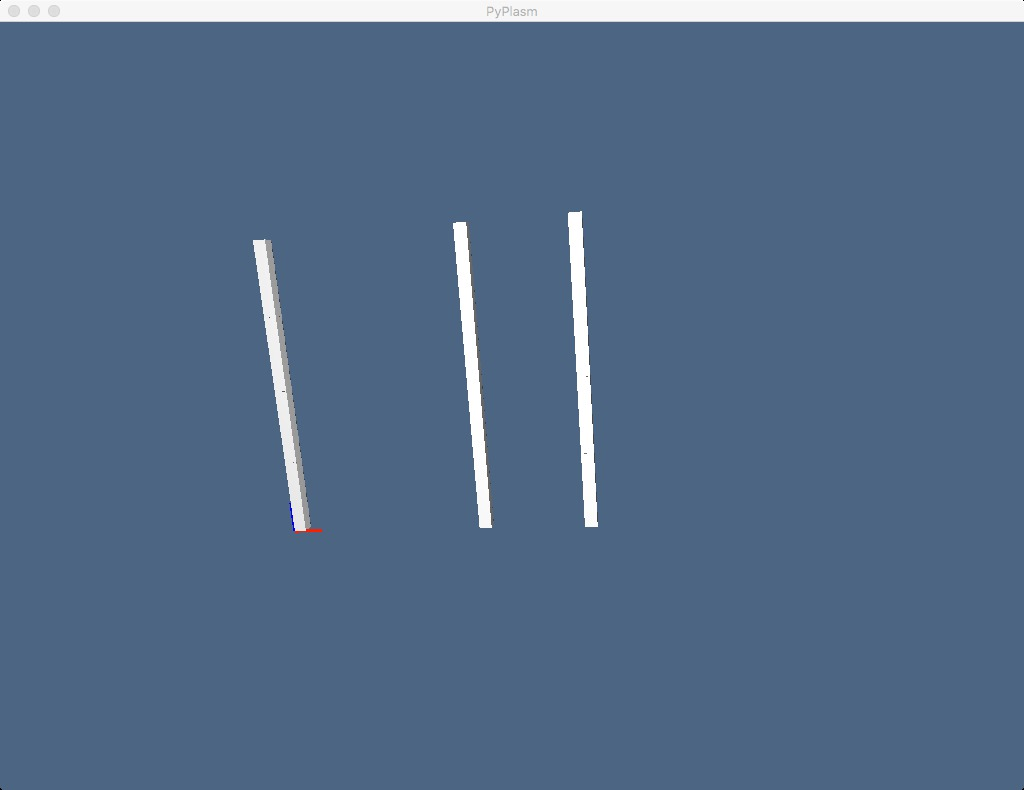

In [12]:
from IPython.display import Image
PATH = "/Users/mac/Downloads/"
Image(filename = PATH + "pilastri.jpg") 

# Porzione della funzione "makeStruct()" per la realizzazione delle travi di un telaio della struttura

#### Creazione array da passare a QUOTE() per la realizzazione della coordinata x della base delle travi del telaio (l'array sarà avrà i stessi elementi dell'array utilizzato per i pilatri cambiati di segno poichè dove c'è un pilastro ci deve essere dello spazio mentre dove c'è dello spazio ci deve essere una trave)
    
    """ array for the realization of the beams """
	beamStruct = [ -x for x in pillarArray]
	
	""" x-axis of the beams """
	xBaseBeam = QUOTE(beamStruct)

	""" y-axis of the beams """
	yBaseBeam = QUOTE([by])
    
#### Prodotto tra la coordinata x e la coordinata y della prima fila di travi del telaio in 2D (senza altezza)
	
    xyBaseBeam = PROD([xBaseBeam, yBaseBeam])

#### Creazione array da passare a QUOTE() per realizzare le travi (l'array conterra la distanza negativa tra le travi del telaio in modo da lasciare il giusto spazio più la lunghezza bz della singola trave)
	
    """ array for distance between the beams """
	beamsDistance = []
	for value in beamInterstoryHeights:
		beamsDistance = beamsDistance+[-value]+[bz]

#### Prodotto tra la base xy in 2D della prima fila di travi e l'altezza 
	
    beams = PROD([xyBaseBeam, QUOTE(beamsDistance)])

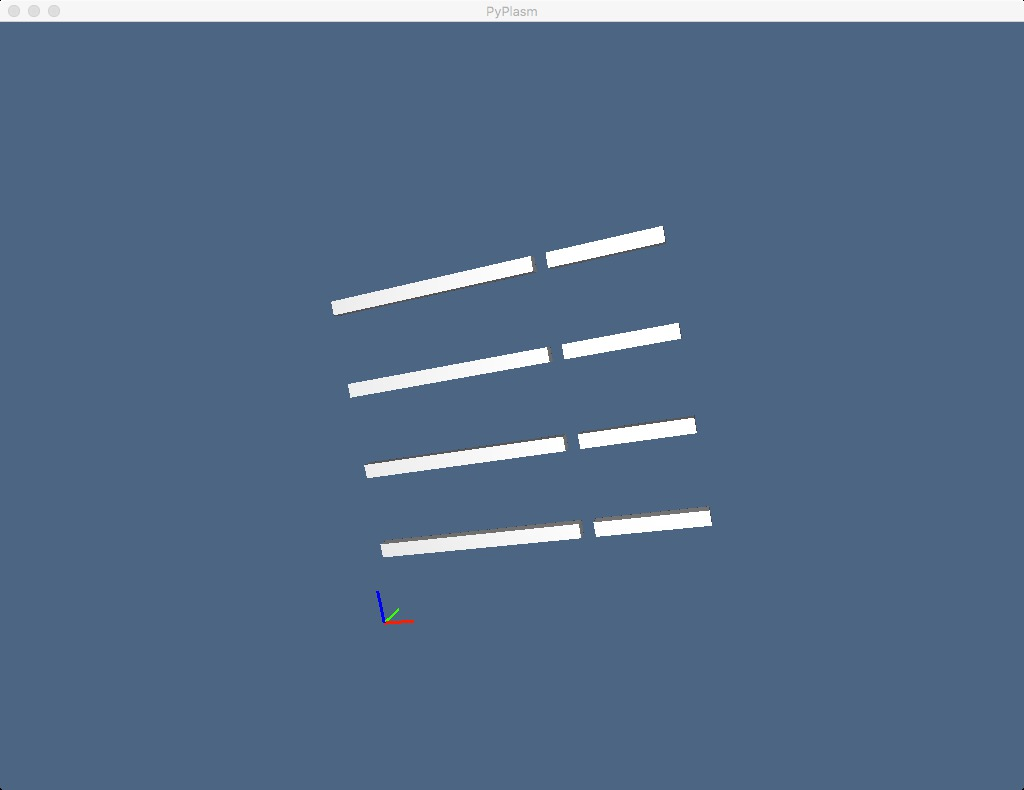

In [13]:
from IPython.display import Image
PATH = "/Users/mac/Downloads/"
Image(filename = PATH + "travi.jpg")

# Realizzazione primo telaio

""" frame """
	struct = STRUCT([pillars, beams])

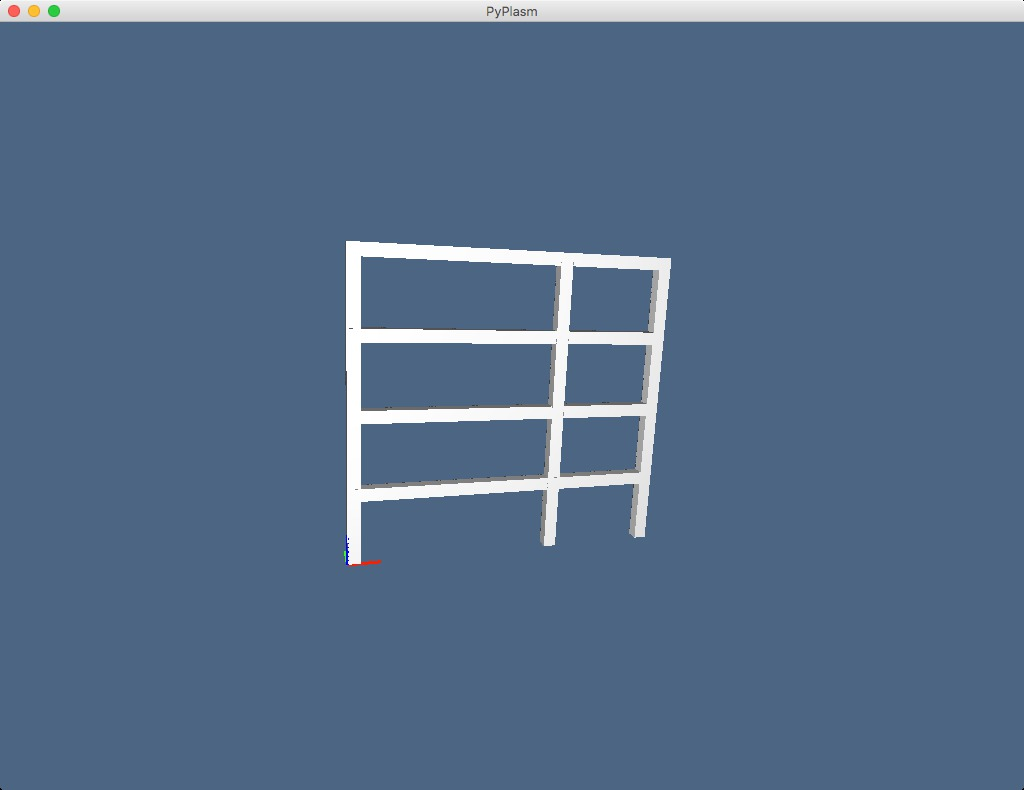

In [14]:
from IPython.display import Image
PATH = "/Users/mac/Downloads/"
Image(filename = PATH + "telaio.jpg")

# Porzione della funzione "makeStruct()" per la realizzazione di una fila di travi perpendicolari tra i telai della struttura

#### Creazione array per realizzare la coordinata y della prima fila di travi tra i telai
    
    """ distance between frames """
	framesDistance = []
	for value in lengthPerpendicularBeams:
		framesDistance = framesDistance + [-py] + [value]

	""" creating beams between frames """
	yBasePerpendicularBeams = QUOTE(framesDistance)

	xBasePerpendicularBeams = QUOTE([by])
    
#### Prodotto tra la coordinata x e la coordinata y della prima fila di travi tra i telai per realizzare fila in 2D
	
    xyBasePerpendicularBeams = PROD([xBasePerpendicularBeams, yBasePerpendicularBeams])

#### Prodotto tra fila in 2D e altezze delle travi tra i telai
	
    xyzBasePerpendicularBeams = PROD([xyBasePerpendicularBeams, QUOTE(beamsDistance)])

#### Realizzazione prima fila di travi tra i telai
	xyzStruct = STRUCT([xyzBasePerpendicularBeams])



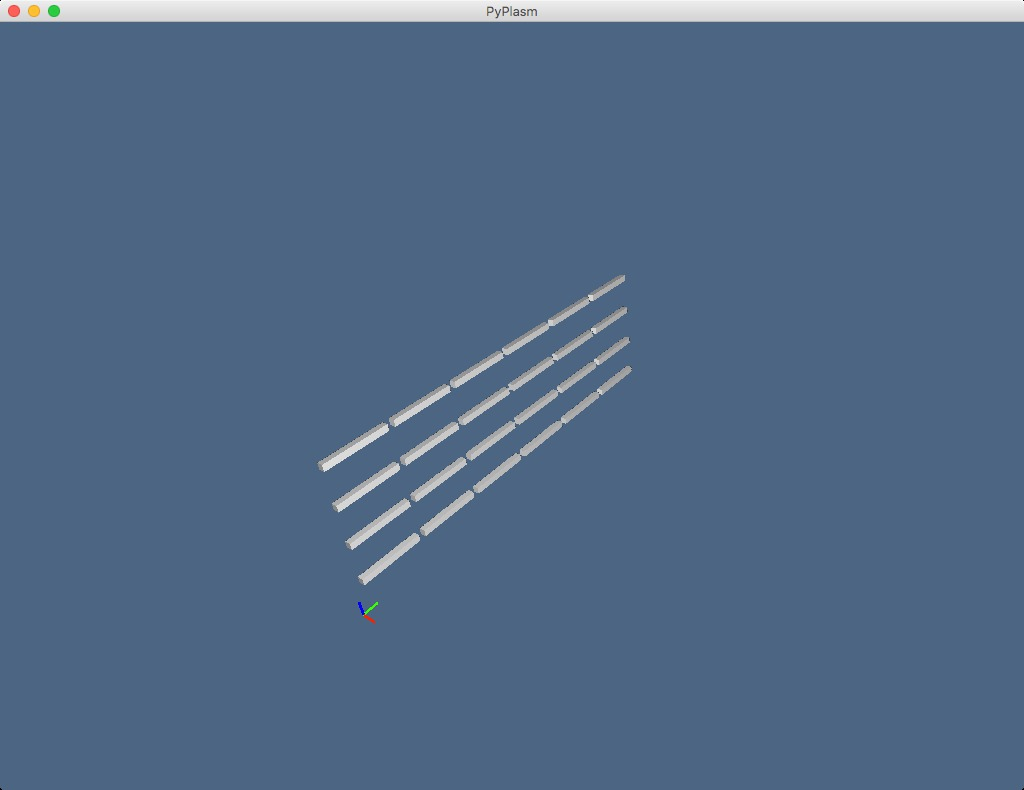

In [15]:
from IPython.display import Image
PATH = "/Users/mac/Downloads/"
Image(filename = PATH + "traviperpendicolari.jpg")

# Duplicazione telaio iniziale e prima fila di travi tra i telai


    
    """ creating arrays for the function T() """
	accumulator=0
	arrayBeams = []

#### Creazione array per passare le corrette distanze alla funzione T() per la duplicazione del telaio
	for value in lengthPerpendicularBeams:
		accumulator = accumulator+value
		arrayBeams=arrayBeams+[accumulator]
        
#### Creazione array per passare le corrette distanze alla funzione T() per la duplicazione delle travi perpendicolari
	accumulator = 0
	arrayPillar = []
	for value in pillarDistances:
		accumulator = accumulator+value
		arrayPillar=arrayPillar+[accumulator]

#### Duplicazione telaio (la distanza è uguale alla lunghezza della trave perpendicolare più py per ogni pilastro precedente)
	""" duplication frames and perpendicular beams """
	dist=py
	structFrames=struct
	for value in arrayBeams:
		structFrames = STRUCT([structFrames, T(2)(value+dist), struct])
		dist+=py
#### Duplicazione travi perpendicolari (la distanza è uguale alla lunghezza della trave perpendicolare più px per ogni pilastro precedente)
	dist=px
	structBeams= xyzStruct
	for value in arrayPillar:
		structBeams = STRUCT([structBeams, T(1)(value+dist), xyzStruct])
		dist+=px

#### Realizzazione della struttura finale attraverso l'unione delle strutture duplicate
	""" merge duplicate structures """
	finalStruct =  STRUCT([structFrames, structBeams])

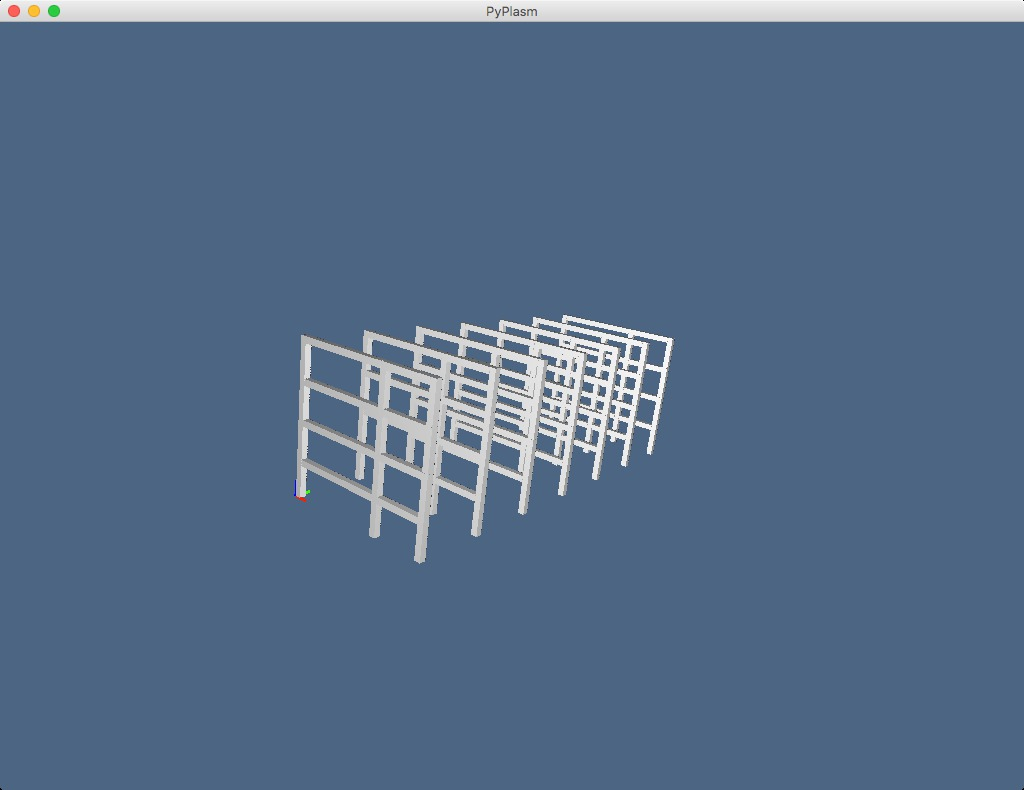

In [16]:
from IPython.display import Image
PATH = "/Users/mac/Downloads/"
Image(filename = PATH + "duplicazionetelai.jpg")

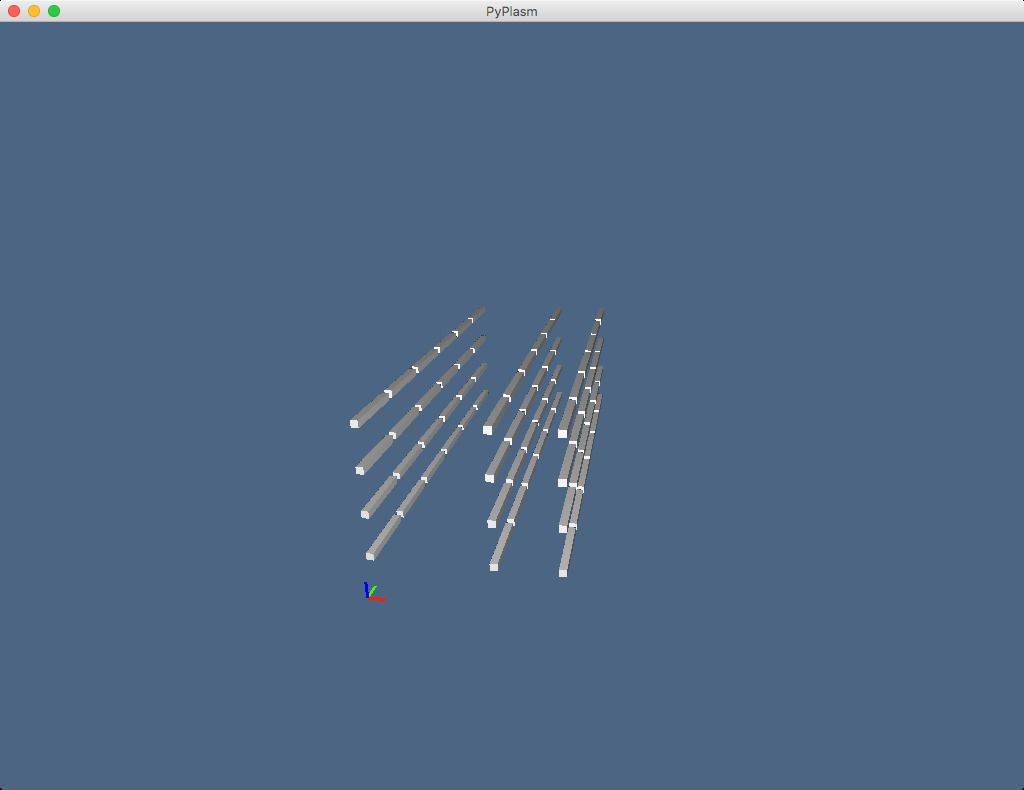

In [17]:
from IPython.display import Image
PATH = "/Users/mac/Downloads/"
Image(filename = PATH + "traviduplicate.jpg")

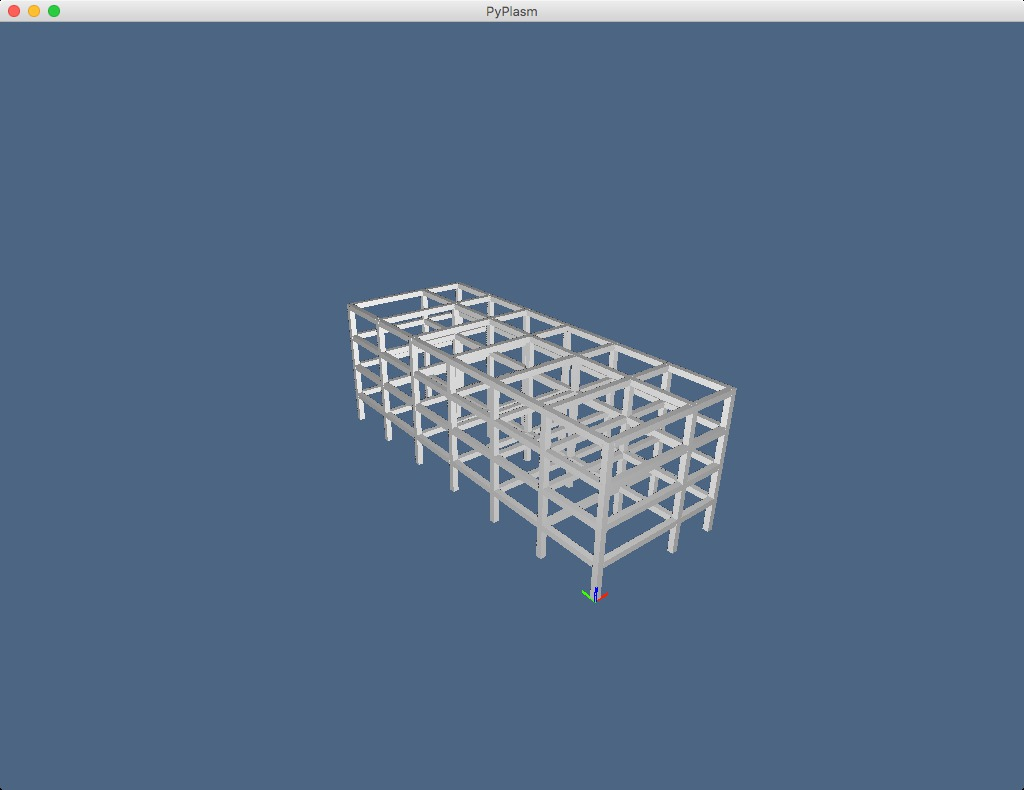

In [18]:
from IPython.display import Image
PATH = "/Users/mac/Downloads/"
Image(filename = PATH + "strutturafinale.jpg")

# Funzione completa 

from larlib import * 

import csv
import sys

def ggpl_bone_structure(file_name):
	
	lengthPerpendicularBeams = []
	""" open csv file """
	with open(file_name, 'rb') as csvFile:
		reader = csv.reader(csvFile)
		i=0
		for row in reader:
			if i%2==1:
				lengthPerpendicularBeams = lengthPerpendicularBeams + [float(row[0])]
				i=i+1
			elif i%2==0:
				(px,py)=(float(row[0]),float(row[1]))
				pillarDistances = []
				j=3
				while row[j]!="]":
					pillarDistances.append(float(row[j]))
					j=j+1
				(by,bz)= (float(row[j+1]),float(row[j+2]))
				j= j+4
				beamInterstoryHeights = []
				while row[j]!="]":
					beamInterstoryHeights.append(float(row[j]))
					j=j+1	
				i=i+1

	return makeStruct((px,py), pillarDistances, (by,bz), beamInterstoryHeights, lengthPerpendicularBeams)

def makeStruct((px,py),pillarDistances,(by,bz), beamInterstoryHeights, lengthPerpendicularBeams):

	""" array for the pillar foundations """
	pillarArray = [px]
	for value in pillarDistances:
		pillarArray = pillarArray+[-value]+[px]
	
	""" x-axis of the pillar """
	xBasePillar = QUOTE(pillarArray)
	
	""" y-axis of the pillar """
	yBasePillar = QUOTE([py])

	xyBasePillar = PROD([xBasePillar, yBasePillar])

	""" array for the z-axis of the pillar """
	heightsPillar = []
	for value in beamInterstoryHeights:
		heightsPillar = heightsPillar+[value+bz]
	
	""" z-axis of the pillar """
	zBasePillar = QUOTE(heightsPillar)

	pillars = PROD([xyBasePillar, zBasePillar])

	""" array for the realization of the beams """
	beamStruct = [ -x for x in pillarArray]
	
	""" x-axis of the beams """
	xBaseBeam = QUOTE(beamStruct)

	""" y-axis of the beams """
	yBaseBeam = QUOTE([by])

	xyBaseBeam = PROD([xBaseBeam, yBaseBeam])

	""" array for distance between the beams """
	beamsDistance = []
	for value in beamInterstoryHeights:
		beamsDistance = beamsDistance+[-value]+[bz]

	beams = PROD([xyBaseBeam, QUOTE(beamsDistance)])

	""" frame """
	struct = STRUCT([pillars, beams])
	
	""" distance between frames """
	framesDistance = []
	for value in lengthPerpendicularBeams:
		framesDistance = framesDistance + [-py] + [value]

	""" creating beams between frames """
	yBasePerpendicularBeams = QUOTE(framesDistance)

	xBasePerpendicularBeams = QUOTE([by])

	xyBasePerpendicularBeams = PROD([xBasePerpendicularBeams, yBasePerpendicularBeams])

	xyzBasePerpendicularBeams = PROD([xyBasePerpendicularBeams, QUOTE(beamsDistance)])

	xyzStruct = STRUCT([xyzBasePerpendicularBeams])

	VIEW(xyzStruct)
	
	""" creating arrays for the function T() """
	accumulator=0
	arrayBeams = []

	for value in lengthPerpendicularBeams:
		accumulator = accumulator+value
		arrayBeams=arrayBeams+[accumulator]

	accumulator = 0
	arrayPillar = []
	for value in pillarDistances:
		accumulator = accumulator+value
		arrayPillar=arrayPillar+[accumulator]

	""" duplication frames and perpendicular beams """
	dist=py
	structFrames=struct
	for value in arrayBeams:
		structFrames = STRUCT([structFrames, T(2)(value+dist), struct])
		dist+=py

	dist=px
	structBeams= xyzStruct
	for value in arrayPillar:
		structBeams = STRUCT([structBeams, T(1)(value+dist), xyzStruct])
		dist+=px

	VIEW(STRUCT([structBeams]))
	VIEW(STRUCT([structFrames]))
	""" merge duplicate structures """
	finalStruct =  STRUCT([structFrames, structBeams])

	return finalStruct

def main():
	
    VIEW(ggpl_bone_structure('frame_data_456893.csv'))

if __name__=='__main__':
	
    main()